<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestr√≠a en Inteligencia Artificial y Anal√≠tica de Datos

## Programaci√≥n para Anal√≠tica Descriptiva y Predictiva - Octubre 2025
## Pr√°ctica: Regresi√≥n Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Manuel de Jes√∫s Mar√≠n Garc√≠a
*   Matr√≠cula: 261555

---

## Objetivo de aprendizaje
Al finalizar esta pr√°ctica, el estudiante ser√° capaz de **aplicar la regresi√≥n lineal simple utilizando Scikit-Learn para modelar la relaci√≥n entre dos variables num√©ricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlaci√≥n entre variables** y evaluar el desempe√±o del modelo mediante m√©tricas como el MSE, RMSE y R¬≤.


Trabajar√°s con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: poblaci√≥n de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la poblaci√≥n de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la poblaci√≥n de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en p√©rdidas mensuales promedio para esa ciudad.





## üîß Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estad√≠sticamente el conjunto de datos.

In [12]:
# 1) Importar librer√≠as
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Estilo de gr√°ficos
sns.set(style="whitegrid", rc={"figure.figsize": (7,5)})

# 1.1) Cargar datos
# Si acabas de subir el archivo con la celda 0, basta con:
df = pd.read_csv("/content/sample_data/restaurantes.csv")

# 1.2) Vista inicial
df.head()

df.describe(include='all')


poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000

##  Parte 2: An√°lisis exploratorio y relaci√≥n entre variables

### 2.1 Diagrama de Dispersi√≥n
1. Grafica un **diagrama de dispersi√≥n** entre `poblation` y `profit`
2. Responde:  
**¬øLa relaci√≥n entre las variables parece lineal? ¬øPor qu√©?**

    * **Existe una relaci√≥n lineal entre la covariable o variable independiente (poblaci√≥n) con la variable profit lo cual nos permite aplicar un modelo de regresi√≥n lineal. Entre mayor es la poblaci√≥n, mayor son las ganancias del restaurant.**


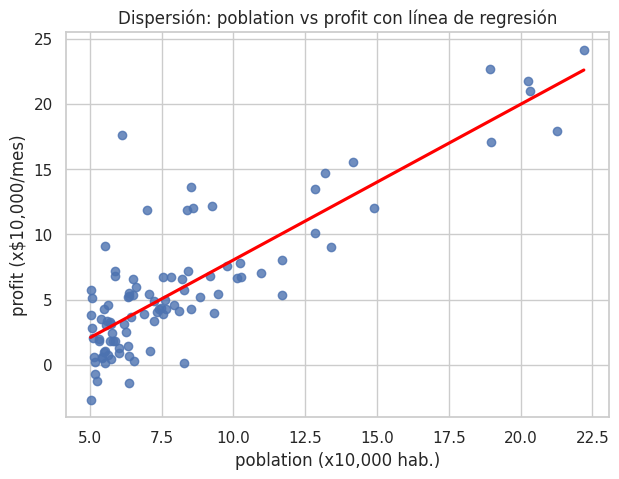

In [13]:


# Diagrama de dispersi√≥n + l√≠nea de regresi√≥n
ax = sns.regplot(data=df, x="poblation", y="profit", ci=None, line_kws={"color": "red"})
ax.set_title("Dispersi√≥n: poblation vs profit con l√≠nea de regresi√≥n")
ax.set_xlabel("poblation (x10,000 hab.)")
ax.set_ylabel("profit (x$10,000/mes)")
plt.show()


### 2.2: C√°lculo e interpretaci√≥n de la correlaci√≥n
1. Calcula e imprime el **coeficiente de correlaci√≥n de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¬øQu√© tan fuerte es la relaci√≥n?

  * **La correlaci√≥n es fuerte, dado que el coeficiente de pearson tiene un valor superior a .8**

- ¬øEs positiva o negativa?

  * **La correlaci√≥n es positiva**

- ¬øEs coherente con el gr√°fico anterior?

  * **Si existe coincidenciacon la grafica de dispersi√≥n**

In [15]:
# 4) C√°lculo del coeficiente de correlaci√≥n de Pearson
pearson_r, pearson_p = stats.pearsonr(df["poblation"], df["profit"])
print(f"Coeficiente de Pearson r = {pearson_r:.4f}")
print(f"p-valor = {pearson_p:.3e}")

# Gu√≠a de interpretaci√≥n
if abs(pearson_r) >= 0.8:
    fuerza = "muy fuerte"
elif abs(pearson_r) >= 0.6:
    fuerza = "fuerte"
elif abs(pearson_r) >= 0.4:
    fuerza = "moderada"
elif abs(pearson_r) >= 0.2:
    fuerza = "d√©bil"
else:
    fuerza = "muy d√©bil o nula"

direccion = "positiva" if pearson_r >= 0 else "negativa"
print(f"Interpretaci√≥n: relaci√≥n {fuerza} y {direccion}.")




Coeficiente de Pearson r = 0.8379
p-valor = 1.023e-26
Interpretaci√≥n: relaci√≥n muy fuerte y positiva.


## Parte 3: Construcci√≥n del modelo, coeficientes y visualizaci√≥n

###3.1 Construcci√≥n del modelo - obtenci√≥n de los par√°metros y coeficientes
1. Construye un modelo de regresi√≥n lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresi√≥n (pendiente)

    * **El valor del intercepto B0 es -3.8958**

3. Interpreta el Intercepto: ¬øQu√© significa en t√©rminos del contexto del problema?

    * **Desde el punto de vista formula de regresi√≥n lineal, el intercepto o B0 significa el valor del modelo cuando B1=0, es decir, cuando la poblaci√≥n sea 0, lo cual es un caso no realista, el profir bajo este escenario hipot√©tico ser√≠a de -3.8958 multiplciado por 10000**

4. Interpreta el coeficiente de la regresi√≥n (pendiente) ¬øQu√© significa en t√©rminos del contexto del problema?

    * **El B1 significa el cambio esperado en profit por cada una unidad de poblaci√≥n**

In [16]:
# 5) Ajuste del modelo: profit ~ poblation
X = df[["poblation"]].values  # sklearn espera 2D
y = df["profit"].values

lin = LinearRegression()
lin.fit(X, y)

intercepto = lin.intercept_
pendiente = lin.coef_[0]

print(f"Intercepto (Œ≤0) = {intercepto:.4f}")
print(f"Pendiente (Œ≤1)  = {pendiente:.4f}")




Intercepto (Œ≤0) = -3.8958
Pendiente (Œ≤1)  = 1.1930


### 3.2 Visualizaci√≥n del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la l√≠nea de regresi√≥n ajustada.
2. Aseg√∫rate de incluir leyenda y t√≠tulos.

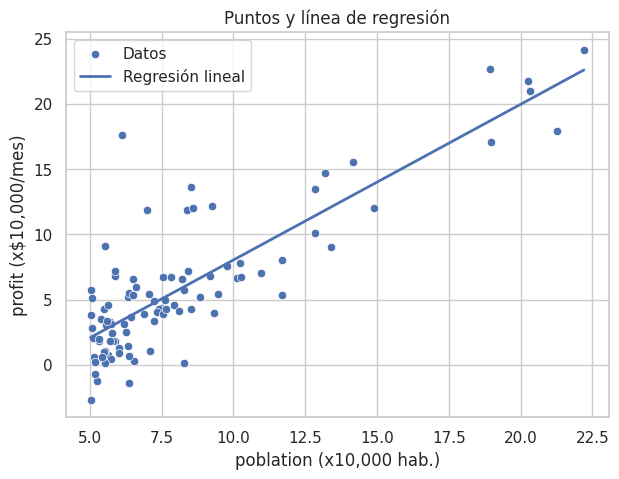

In [7]:
# 6) Puntos + l√≠nea de regresi√≥n
x_min, x_max = df["poblation"].min(), df["poblation"].max()
x_line = np.linspace(x_min, x_max, 200).reshape(-1, 1)
y_line = lin.predict(x_line)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="poblation", y="profit", label="Datos")
plt.plot(x_line, y_line, label="Regresi√≥n lineal", linewidth=2)
plt.title("Puntos y l√≠nea de regresi√≥n")
plt.xlabel("poblation (x10,000 hab.)")
plt.ylabel("profit (x$10,000/mes)")
plt.legend()
plt.show()


## Parte 4: Supuestos del modelo de regresi√≥n lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¬øLos residuos siguen una distribuci√≥n normal?
    * **Si, los residuos siguen una distribuci√≥n normal, sin colas extremas**

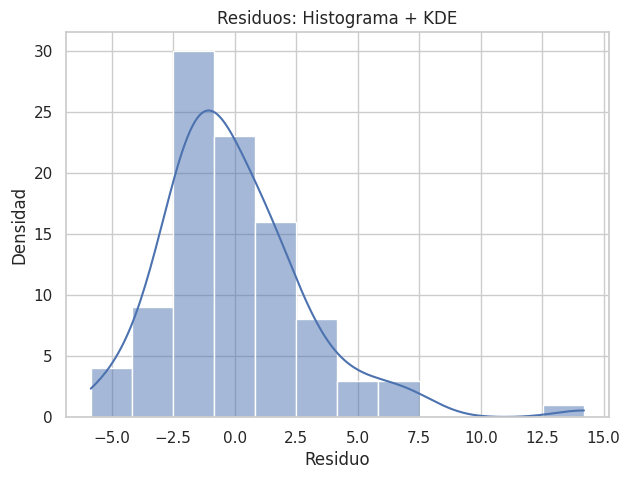

In [17]:
# 7) Residuos (reales - predichos)
y_pred = lin.predict(X)
residuos = y - y_pred

# Histograma + KDE
plt.figure(figsize=(7,5))
sns.histplot(residuos, kde=True, bins=12)
plt.title("Residuos: Histograma + KDE")
plt.xlabel("Residuo")
plt.ylabel("Densidad")
plt.show()



### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¬øLos residuos est√°n distribuidos aleatoriamente o muestran un patr√≥n?
    * **Los residuos presentan varianza constante, es decir no se observa una relaci√≥n con los predichos, por lo que los estimadores de m√≠nimos cuadrados ordinarios se cosideran eficientes.**

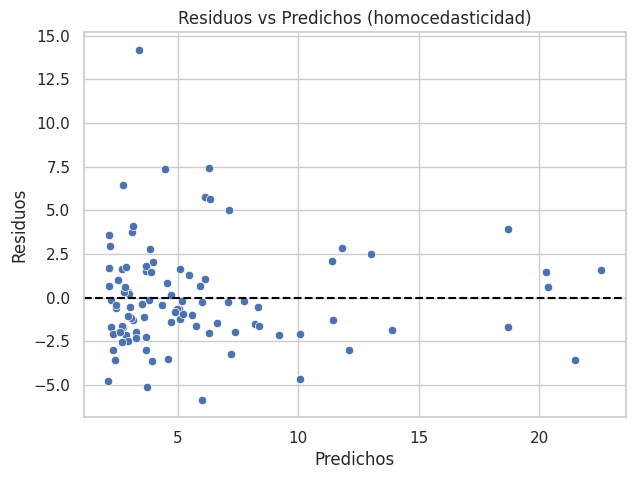

In [18]:
# 8) Residuos vs valores predichos
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, ls="--", c="black")
plt.title("Residuos vs Predichos (homocedasticidad)")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()




### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gr√°fico: a) Si los puntos se alinean aproximadamente sobre la l√≠nea diagonal, los residuos siguen una distribuci√≥n normal y b) Desviaciones sistem√°ticas indican asimetr√≠a o colas pesadas.

    - **Si los puntos siguen la diagonal, la distribuci√≥n de residuos es ~ normal.**

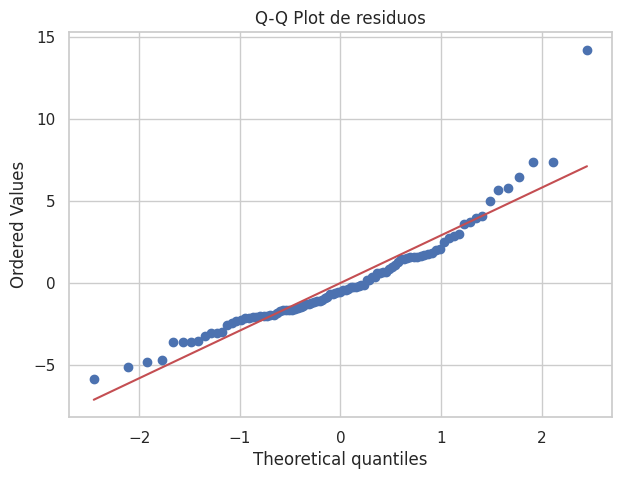

In [19]:
# 9) Q-Q Plot
import matplotlib.pyplot as plt
import scipy.stats as st

plt.figure(figsize=(7,5))
st.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de residuos")
plt.show()



## Parte 5: Evaluaci√≥n del modelo
1. Calcula las m√©tricas:
- **MSE = 8.9539**
- **RMSE = 2.9923  (en unidades de $10,000)**
- **R¬≤ =  0.7020**
2. Interpreta: ¬øQu√© nos dicen sobre el ajuste del modelo?
    *  **El R2 nos mide la proporci√≥n de la varianza de datos que el modelos logra explicar. Es decir, explcia aproximadamente el 70.2% del universo de datos, lo que significa que el 29.8% restante no puede ser explicado por este modelo (por ruido o variables no incluidas). El error tipico de de ~30000 USD que se obtiene por medio de RMSE es un error alto, pero depende del rango de valores de la variable dependiente.**

In [11]:
# 10) M√©tricas de evaluaci√≥n
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}  (en unidades de $10,000)")
print(f"R¬≤   = {r2:.4f}")

# Resumen autom√°tico
utilidad = ("alta" if r2 >= 0.7 else "moderada" if r2 >= 0.5 else "limitada")
print(f"\nLectura r√°pida: R¬≤ ‚âà {r2:.2f} ‚Üí capacidad explicativa {utilidad}.")
print("RMSE te da el error t√≠pico de predicci√≥n en decenas de miles de USD/mes.")


MSE  = 8.9539
RMSE = 2.9923  (en unidades de $10,000)
R¬≤   = 0.7020

Lectura r√°pida: R¬≤ ‚âà 0.70 ‚Üí capacidad explicativa alta.
RMSE te da el error t√≠pico de predicci√≥n en decenas de miles de USD/mes.


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¬øQu√© tan √∫til consideras el modelo?
    * **Con los datos que se tiene y el valor de R2 se puede considerar un modelo relativamente bueno.**
- ¬øQu√© limitaciones encuentras?
    * **No existen m√°s variables que se puedan tomar en cuenta para mejorar el modelo.**
- ¬øCrees que es necesario hacer un ajuste o estandarizaci√≥n a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

  *   **Dado que los residuos son normales/homocedasticos, no hay mas opciones para mejorar el modelos con los datos actuales, al menos que se pueden agregar m√°s covariables para aplicar un modelo de correlaci√≥n lineal m√∫ltiple.**


